# Portfolio Construction and Analysis -- Execution using IBKR API
## Objectives
1. Select some assets based on their historical performances as portfolio.
2. Execute the trades using IBKR API

In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sys
sys.path.insert(0, r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files')
import functions_1 as fnc
from ib_insync import *
util.startLoop()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Assets
First I will select the assets I want in my portfolio, this will be done manually although there can be advanced methods of doing this but right now I don't know how to do it and it's not my goal too, so I will first select a bunchg of ETFs from Yahoo Finance and then check their previous performances and run a backtest too, then I will execute the suitable portfolio weights in a simulated IBKR account which currently has $1000000 balance in it. I will rebalnce this portfolio on quarterly basis. This is the first portfolio I am running a forward test in but as I learn more and gather more knowlege and ideas I will do some much more advanced type of long term portfolio executions.

So far I have developed all the tools I need in order to analyze a portfolio but now comes the main part which is deciding and then actually executing my ideas.

In [2]:
tickers = ['VGTSX', 'VIMSX', 'VIVAX', 'VISVX', 'NAESX', 'VWO', 'SPY', 'USRT', 'IAU', 'VGLT', 'VONG', 'IXUS', 'VCSH', 'VTIP',
            'VCIT', 'TLT', 'BNDX', 'QQQ', 'BND', 'VXUS', 'EMB']
r_d_all = fnc.get_returns_data(tickers=tickers, replace_tickers=None, interval='1d', dividends=True)

In [3]:
r_d_all.index = pd.to_datetime(r_d_all.index.date)

In [4]:
r_d_all

,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,USRT,IAU,VGLT,...,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS,EMB
1980-01-03,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,0.004631,0.004566,0.002213,0.005942,0.006262,0.003912,0.007424,-0.004973,0.008432,-0.005454,...,0.006504,0.000292,0.000850,-0.000492,-0.005200,-0.000321,0.013541,-0.000880,0.005556,0.000535
2024-01-19,0.003191,0.006676,0.006625,0.008269,0.008729,0.006100,0.010422,0.008870,0.003136,0.001714,...,0.003977,-0.000389,-0.000170,0.000246,0.001782,0.001446,0.018931,0.000000,0.003684,0.000238
2024-01-22,-0.000707,0.006773,0.002323,0.010740,0.012081,-0.005221,0.001771,0.003344,-0.003907,0.003650,...,-0.000619,0.000680,0.000000,0.001393,0.003321,0.000321,0.001248,0.001057,-0.000393,0.000357
2024-01-23,0.000707,-0.000561,0.002575,-0.004444,-0.002963,0.003725,0.002444,-0.004073,0.003923,-0.004432,...,0.000495,-0.000194,-0.000680,-0.001310,-0.004433,-0.001765,0.003965,-0.001495,0.000525,-0.002673


In [5]:
r_d_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11108 entries, 1980-01-03 to 2024-01-24
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VGTSX   6980 non-null   float64
 1   VIMSX   6459 non-null   float64
 2   VIVAX   7862 non-null   float64
 3   VISVX   6459 non-null   float64
 4   NAESX   11107 non-null  float64
 5   VWO     4750 non-null   float64
 6   SPY     7801 non-null   float64
 7   USRT    4209 non-null   float64
 8   IAU     4778 non-null   float64
 9   VGLT    3537 non-null   float64
 10  VONG    3356 non-null   float64
 11  IXUS    2828 non-null   float64
 12  VCSH    3564 non-null   float64
 13  VTIP    2834 non-null   float64
 14  VCIT    3564 non-null   float64
 15  TLT     5408 non-null   float64
 16  BNDX    2678 non-null   float64
 17  QQQ     6259 non-null   float64
 18  BND     4227 non-null   float64
 19  VXUS    3267 non-null   float64
 20  EMB     4050 non-null   float64
dtypes: float64(21)
mem

In [6]:
start_dates = fnc.start_dates(r_d_all)
start_dates

{'NAESX': Timestamp('1980-01-03 00:00:00'),
 'VIVAX': Timestamp('1992-11-02 00:00:00'),
 'SPY': Timestamp('1993-02-01 00:00:00'),
 'VGTSX': Timestamp('1996-04-30 00:00:00'),
 'VIMSX': Timestamp('1998-05-22 00:00:00'),
 'VISVX': Timestamp('1998-05-22 00:00:00'),
 'QQQ': Timestamp('1999-03-11 00:00:00'),
 'TLT': Timestamp('2002-07-31 00:00:00'),
 'IAU': Timestamp('2005-01-31 00:00:00'),
 'VWO': Timestamp('2005-03-11 00:00:00'),
 'BND': Timestamp('2007-04-11 00:00:00'),
 'USRT': Timestamp('2007-05-07 00:00:00'),
 'EMB': Timestamp('2007-12-20 00:00:00'),
 'VCSH': Timestamp('2009-11-24 00:00:00'),
 'VCIT': Timestamp('2009-11-24 00:00:00'),
 'VGLT': Timestamp('2010-01-05 00:00:00'),
 'VONG': Timestamp('2010-09-23 00:00:00'),
 'VXUS': Timestamp('2011-01-31 00:00:00'),
 'VTIP': Timestamp('2012-10-17 00:00:00'),
 'IXUS': Timestamp('2012-10-25 00:00:00'),
 'BNDX': Timestamp('2013-06-05 00:00:00')}

As there are some assets which do not have enough data, I will filter the dataset by removing those assets so that I can at least have enough data to make some conclusions or do some reasonable backtests.

In [7]:
start_year = 2024
assets_before_start_year = [asset for asset, start_date in start_dates.items() if pd.to_datetime(start_date).year < start_year]
assets_before_start_year

['NAESX',
 'VIVAX',
 'SPY',
 'VGTSX',
 'VIMSX',
 'VISVX',
 'QQQ',
 'TLT',
 'IAU',
 'VWO',
 'BND',
 'USRT',
 'EMB',
 'VCSH',
 'VCIT',
 'VGLT',
 'VONG',
 'VXUS',
 'VTIP',
 'IXUS',
 'BNDX']

In [8]:
r_d = r_d_all[assets_before_start_year]
r_d

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
1980-01-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,0.006262,0.002213,0.007424,0.004631,0.004566,0.005942,0.013541,-0.005200,0.008432,0.003912,...,-0.004973,0.000535,0.000292,-0.000492,-0.005454,0.012491,0.005556,0.000850,0.006504,-0.000321
2024-01-19,0.008729,0.006625,0.010422,0.003191,0.006676,0.008269,0.018931,0.001782,0.003136,0.006100,...,0.008870,0.000238,-0.000389,0.000246,0.001714,0.013879,0.003684,-0.000170,0.003977,0.001446
2024-01-22,0.012081,0.002323,0.001771,-0.000707,0.006773,0.010740,0.001248,0.003321,-0.003907,-0.005221,...,0.003344,0.000357,0.000680,0.001393,0.003650,0.002574,-0.000393,0.000000,-0.000619,0.000321
2024-01-23,-0.002963,0.002575,0.002444,0.000707,-0.000561,-0.004444,0.003965,-0.004433,0.003923,0.003725,...,-0.004073,-0.002673,-0.000194,-0.001310,-0.004432,0.002567,0.000525,-0.000680,0.000495,-0.001765


In [9]:
r_d.dropna(inplace=True)
r_d

C:\Users\user\AppData\Local\Temp\ipykernel_7416\239412674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_d.dropna(inplace=True)


,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
2013-06-05,-0.011959,-0.009054,-0.010895,-0.012614,-0.011844,-0.012003,-0.012434,0.009264,0.002946,-0.016707,...,-0.006572,-0.004702,-0.000228,-0.002446,0.009473,-0.013624,-0.016858,0.000000,-0.017006,0.001193
2013-06-06,0.010023,0.006526,0.007023,0.002738,0.009870,0.008797,0.004638,-0.000409,0.008076,0.008396,...,0.012312,0.001057,-0.000341,0.003628,0.001341,0.007487,0.005651,-0.000604,0.003268,-0.001389
2013-06-07,0.008426,0.008818,0.009887,0.003640,0.011868,0.007890,0.013060,-0.012049,-0.024035,-0.003568,...,-0.003994,-0.003851,0.000797,-0.003028,-0.013997,0.012428,0.005619,-0.002014,0.007281,-0.001989
2013-06-10,0.002043,0.000257,0.000000,0.000453,-0.000690,0.002060,0.000390,-0.003197,0.005224,-0.011538,...,-0.002734,-0.007045,0.000000,-0.003920,-0.004445,0.000000,-0.000771,0.000000,-0.000191,-0.007172
2013-06-11,-0.009821,-0.006940,-0.008041,-0.009063,-0.010356,-0.010279,-0.009502,0.007959,-0.005197,-0.016101,...,-0.012975,-0.015069,-0.001252,-0.002459,0.005828,-0.007593,-0.012919,-0.002018,-0.012747,-0.000201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17,-0.006824,-0.004794,-0.004645,-0.008126,-0.007084,-0.007080,-0.005383,-0.000886,-0.011461,-0.008935,...,-0.012764,-0.001958,-0.001650,-0.001963,-0.001362,-0.004424,-0.008135,-0.001359,-0.008802,-0.002244
2024-01-18,0.006262,0.002213,0.007424,0.004631,0.004566,0.005942,0.013541,-0.005200,0.008432,0.003912,...,-0.004973,0.000535,0.000292,-0.000492,-0.005454,0.012491,0.005556,0.000850,0.006504,-0.000321
2024-01-19,0.008729,0.006625,0.010422,0.003191,0.006676,0.008269,0.018931,0.001782,0.003136,0.006100,...,0.008870,0.000238,-0.000389,0.000246,0.001714,0.013879,0.003684,-0.000170,0.003977,0.001446
2024-01-22,0.012081,0.002323,0.001771,-0.000707,0.006773,0.010740,0.001248,0.003321,-0.003907,-0.005221,...,0.003344,0.000357,0.000680,0.001393,0.003650,0.002574,-0.000393,0.000000,-0.000619,0.000321


<Axes: title={'center': 'Annualized Returns'}>

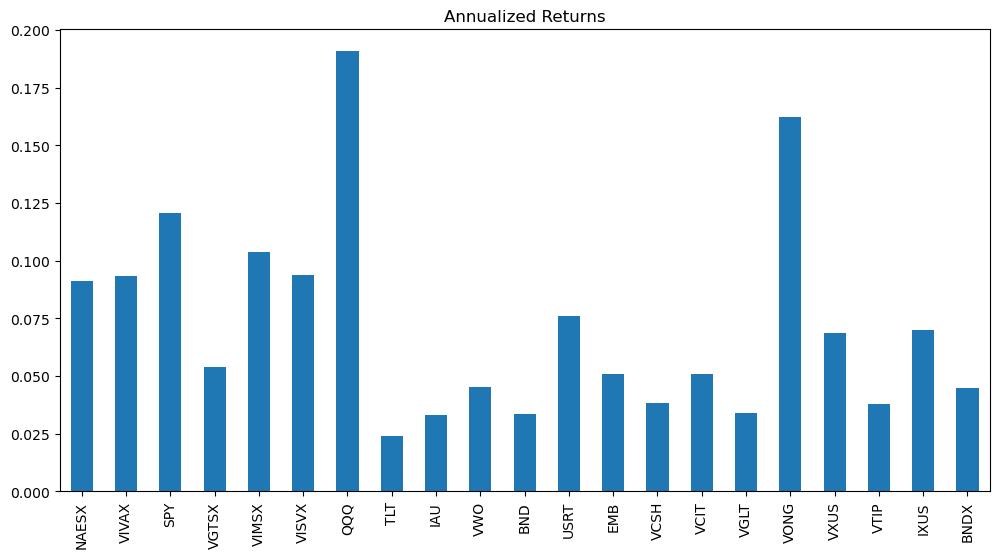

In [10]:
annu_r = fnc.annualize_returns(r_d, 252)
annu_r.plot.bar(title= 'Annualized Returns', figsize=(12, 6))

<Axes: title={'center': 'Annualized Volatility'}>

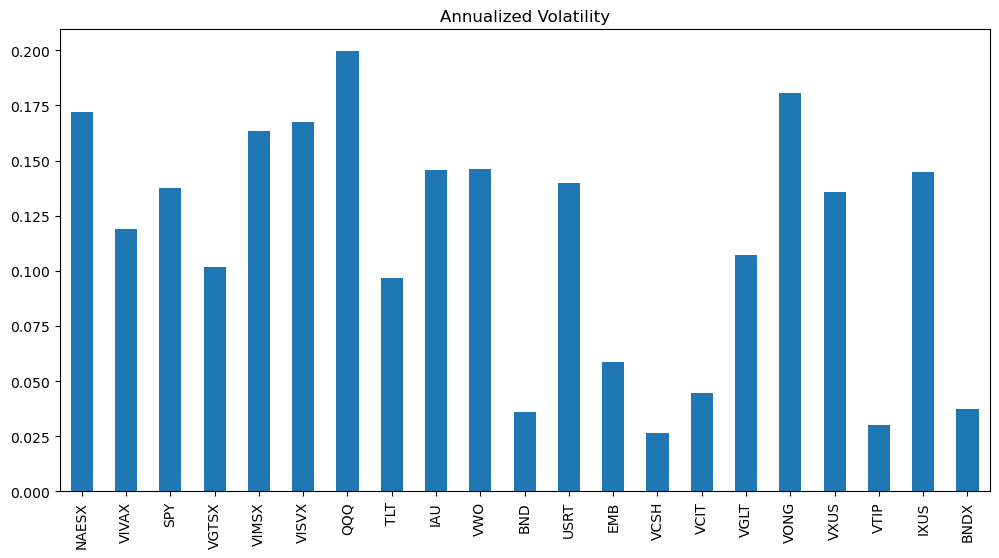

In [11]:
fnc.annualize_vol(r_d, 252).plot.bar(title= 'Annualized Volatility', figsize=(12, 6))

<Axes: title={'center': 'Sharpe Ratio of Individual Assets'}>

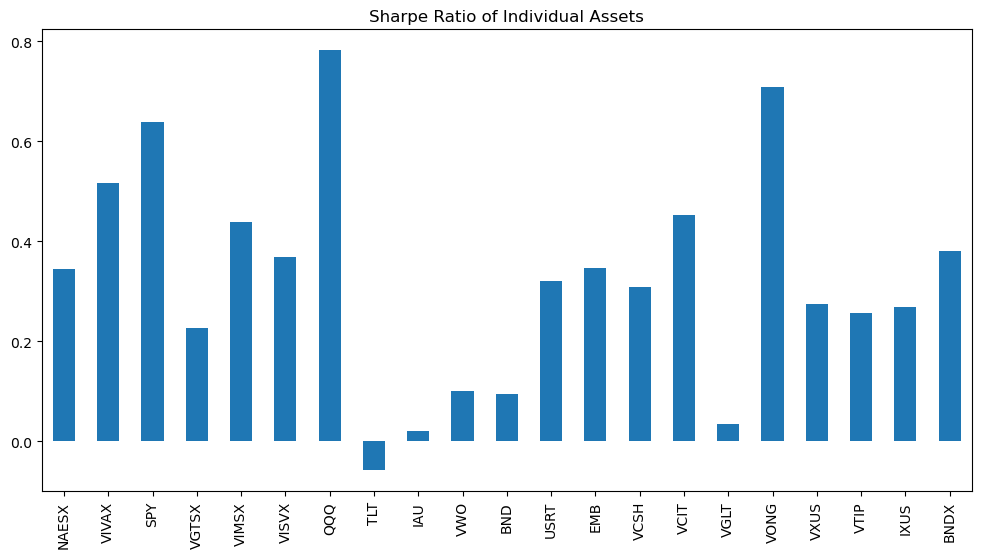

In [12]:
fnc.sharpe_ratio(r_d, 0.03, 252).plot.bar(figsize=(12,6), title='Sharpe Ratio of Individual Assets')

In [13]:
import seaborn as sns

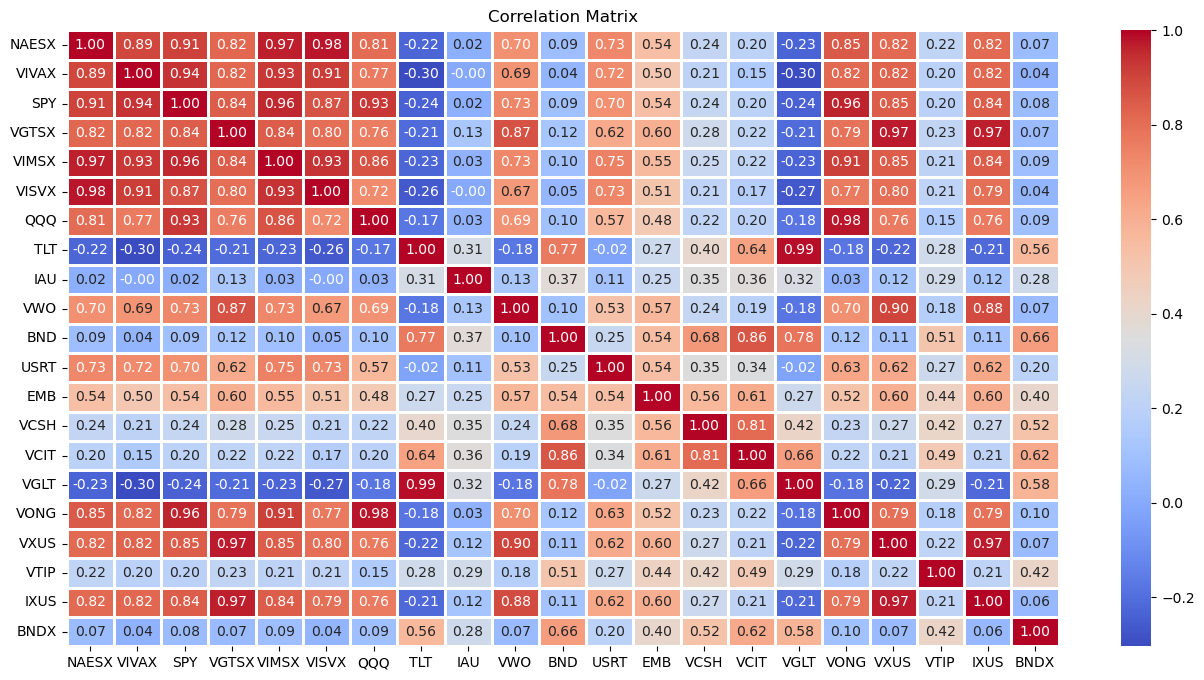

In [14]:
corr = r_d.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)
plt.title('Correlation Matrix')
plt.show()

In [15]:
r_d.corr().describe()

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.533168,0.507274,0.543796,0.539146,0.550424,0.507082,0.501574,0.132603,0.203091,0.486833,...,0.487165,0.519136,0.388918,0.408960,0.135303,0.525214,0.537993,0.314513,0.536339,0.287548
std,0.417361,0.434507,0.428532,0.398813,0.424847,0.420481,0.387425,0.440842,0.226682,0.364152,...,0.274873,0.155517,0.216072,0.266568,0.446330,0.397015,0.405249,0.190566,0.402619,0.276700
min,-0.231740,-0.303507,-0.239858,-0.210467,-0.230261,-0.267243,-0.176885,-0.303121,-0.000781,-0.177770,...,-0.019513,0.252660,0.207311,0.150110,-0.303507,-0.181308,-0.224043,0.153181,-0.213458,0.036565
25%,0.203895,0.150110,0.197455,0.217541,0.209298,0.172463,0.153181,-0.221505,0.029245,0.179017,...,0.269549,0.483428,0.238082,0.204204,-0.224043,0.179538,0.206937,0.209298,0.208091,0.071315
50%,0.725949,0.719027,0.731695,0.760325,0.746185,0.716909,0.694958,-0.174444,0.126875,0.670765,...,0.566756,0.538833,0.280523,0.220464,-0.176885,0.704708,0.764995,0.225895,0.761032,0.101867
75%,0.850177,0.824412,0.907785,0.844338,0.909317,0.797606,0.765304,0.399355,0.311692,0.729251,...,0.701428,0.569089,0.421292,0.620919,0.421292,0.816416,0.845277,0.417868,0.842546,0.518705
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Portfolio Selection
Now that we have got assets that we want to buy let's analyze which portfolio weighting scheme will be most suitable for us.

<Axes: xlabel='Volatility'>

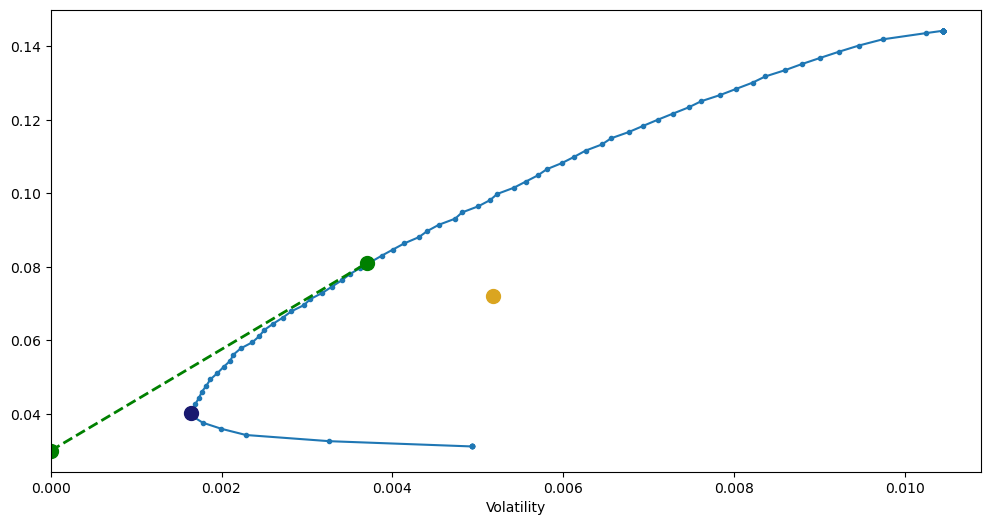

In [16]:
cov = r_d.cov()
fnc.plot_ef(100, annu_r, cov, show_gmv=True, show_ew= True, show_msr=True, riskfree_rate=0.03, max_asset_weight=0.25) #max allocation for each asset = 25%

## Backtests
Backtest and analyze the results of backtesting results of different types of portfolios

In [17]:
target_rets = [0.06, 0.08, 0.10, 0.12, annu_r.mean()]
backtest = fnc.combined_backtesting_result(r_d, portfolios=['GMV', 'MSR', 'EW', 'TR'], periods_per_year=252, starting_balance=1000, starting_step=900,
                                            rolling_period=0, reweight_period=90, weights_column=True, max_asset_weight= 0.20, riskfree_rate=0.03,
                                              target_returns=target_rets, weight_constraints = 1)

In [18]:
backtest

Global Minimum Variance                                          \
                           Returns Account History  Drawdown Previous Peak   
2016-12-29                0.001176     1001.176028  0.000000   1001.176028   
2016-12-30                0.000718     1001.895056  0.000000   1001.895056   
2017-01-03               -0.000386     1001.508456 -0.000386   1001.895056   
2017-01-04                0.001011     1002.521036  0.000000   1002.521036   
2017-01-05                0.001227      1003.75096  0.000000   1003.750960   
...                            ...             ...       ...           ...   
2024-01-17               -0.001985     1343.154994 -0.007849   1353.780154   
2024-01-18                0.000102     1343.292019 -0.007747   1353.780154   
2024-01-19                0.000484     1343.942344 -0.007267   1353.780154   
2024-01-22                0.000661     1344.830052 -0.006611   1353.780154   
2024-01-23               -0.000926     1343.584566 -0.007531   1353.780154   

                                                               \
                                                      Weights   
2016-12-29  {'NAESX': 1.060032556616284e-12, 'VIVAX': 0.09...   
2016-12-30  {'NAESX': 1.060032556616284e-12, 'VIVAX': 0.09...   
2017-01-03  {'NAESX': 1.060032556616284e-12, 'VIVAX': 0.09...   
2017-01-04  {'NAESX': 1.060032556616284e-12, 'VIVAX': 0.09...   
2017-01-05  {'NAESX': 1.060032556616284e-12, 'VIVAX': 0.09...   
...                                                       ...   
2024-01-17  {'NAESX': 4.3685997309457034e-09, 'VIVAX': 0.0...   
2024-01-18  {'NAESX': 4.3685997309457034e-09, 'VIVAX': 0.0...   
2024-01-19  {'NAESX': 4.3685997309457034e-09, 'VIVAX': 0.0...   
2024-01-22  {'NAESX': 4.3685997309457034e-09, 'VIVAX': 0.0...   
2024-01-23  {'NAESX': 4.3685997309457034e-09, 'VIVAX': 0.0...   

           Maximum Sharpe Ratio                                          \
                        Returns Account History  Drawdown Previous Peak   
2016-12-29             0.001227      1001.22655  0.000000   1001.226550   
2016-12-30            -0.000993     1000.232807 -0.000993   1001.226550   
2017-01-03             0.000984     1001.217427 -0.000009   1001.226550   
2017-01-04             0.002666     1003.886873  0.000000   1003.886873   
2017-01-05             0.002630     1006.527285  0.000000   1006.527285   
...                         ...             ...       ...           ...   
2024-01-17            -0.002629     1538.326729 -0.012285   1557.460709   
2024-01-18             0.003253     1543.330871 -0.009072   1557.460709   
2024-01-19             0.004573     1550.388632 -0.004541   1557.460709   
2024-01-22             0.000803     1551.633354 -0.003742   1557.460709   
2024-01-23             0.000112     1551.806652 -0.003630   1557.460709   

                                                               ...  \
                                                      Weights  ...   
2016-12-29  {'NAESX': 0.0, 'VIVAX': 0.019208509116191406, ...  ...   
2016-12-30  {'NAESX': 0.0, 'VIVAX': 0.019208509116191406, ...  ...   
2017-01-03  {'NAESX': 0.0, 'VIVAX': 0.019208509116191406, ...  ...   
2017-01-04  {'NAESX': 0.0, 'VIVAX': 0.019208509116191406, ...  ...   
2017-01-05  {'NAESX': 0.0, 'VIVAX': 0.019208509116191406, ...  ...   
...                                                       ...  ...   
2024-01-17  {'NAESX': 3.4960258231254084e-12, 'VIVAX': 2.1...  ...   
2024-01-18  {'NAESX': 3.4960258231254084e-12, 'VIVAX': 2.1...  ...   
2024-01-19  {'NAESX': 3.4960258231254084e-12, 'VIVAX': 2.1...  ...   
2024-01-22  {'NAESX': 3.4960258231254084e-12, 'VIVAX': 2.1...  ...   
2024-01-23  {'NAESX': 3.4960258231254084e-12, 'VIVAX': 2.1...  ...   

           Target Returns 12.0%                                          \
                        Returns Account History  Drawdown Previous Peak   
2016-12-29             0.000257     1000.256856  0.000000   1000.256856   
2016-12-30            -0.004886      9

In [19]:
rets = backtest.xs('Returns', level=1, axis=1)
hist = backtest.xs('Account History', level=1, axis=1)
weights = backtest.xs('Weights', level=1, axis=1)
drawdown = backtest.xs('Drawdown', level=1, axis=1)
prev_peak = backtest.xs('Previous Peak', level=1, axis=1)

In [20]:
# Add S&P500 returns to returns dataframe in order to compare
sp500 = fnc.get_returns_data(tickers=['^GSPC'], start = rets.index[0], end = rets.index[-1], interval='1d')
sp500.index = sp500.index.date
rets['S&P500'] = sp500

C:\Users\user\AppData\Local\Temp\ipykernel_7416\2219055362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rets['S&P500'] = sp500


In [21]:
fnc.summary_stats(rets, periods_per_year=252, riskfree_rate= 0.03)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Global Minimum Variance,0.042772,0.032333,-1.230167,32.982334,0.002603,0.004432,0.383566,-0.077549,-2581 days
Maximum Sharpe Ratio,0.064298,0.060720,-0.557976,11.151752,0.005990,0.009250,0.548461,-0.173949,-2581 days
Equally Weighted,0.078108,0.089825,-1.100954,18.769348,0.008831,0.013455,0.520031,-0.179931,-2581 days
Target Returns 6.0%,0.079580,0.071302,-0.345812,11.806976,0.006705,0.010525,0.675170,-0.171324,-2581 days
Target Returns 8.0%,0.099318,0.100475,-0.163680,10.769857,0.009311,0.014791,0.669888,-0.212537,-2581 days
Target Returns 10.0%,0.100577,0.139345,-0.843307,15.584480,0.013773,0.021307,0.491790,-0.238534,-2581 days
Target Returns 12.0%,0.116581,0.157806,-0.918971,15.063008,0.015878,0.024500,0.532725,-0.258932,-2581 days
Target Returns 7.2191700832658245%,0.095434,0.090289,-0.005093,11.408173,0.008018,0.013198,0.703695,-0.199438,-2581 days
S&P500,0.115138,0.192434,-0.544063,17.772873,0.017621,NaN,0.429765,-0.339250,-2580 days


<Axes: title={'center': 'Performance of different Portfolio schemes'}>

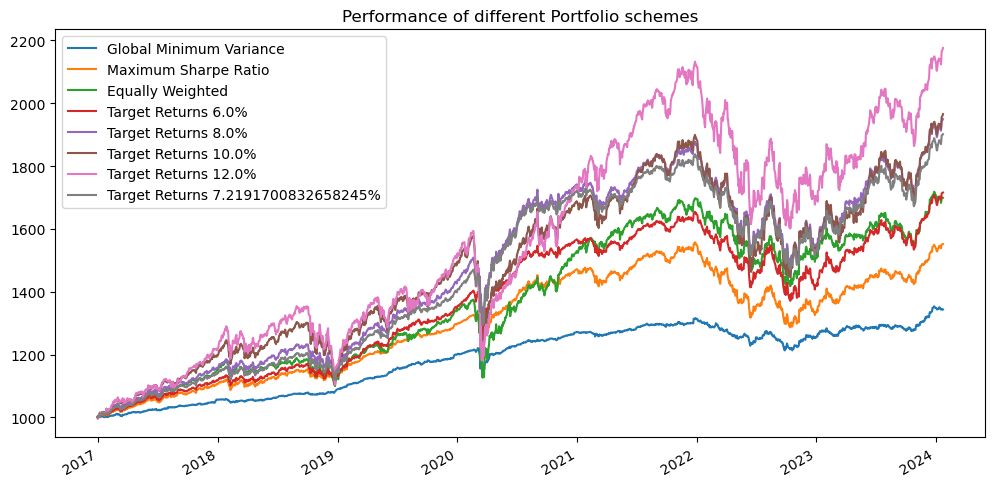

In [22]:
hist.plot(figsize=(12, 6), title= 'Performance of different Portfolio schemes')

In [23]:
weights_change = fnc.weights_change(weights)

In [24]:
weights_mean = fnc.weights_mean(weights_change)
weights_mean

,Global Minimum Variance,Maximum Sharpe Ratio,Equally Weighted,Target Returns 6.0%,Target Returns 8.0%,Target Returns 10.0%,Target Returns 12.0%,Target Returns 7.2191700832658245%
NAESX,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.015857,0.000000
VIVAX,0.056781,0.028730,0.047619,0.018745,0.030295,0.056246,0.054060,0.018406
SPY,0.000000,0.000000,0.047619,0.006314,0.066092,0.170477,0.200000,0.034623
VGTSX,0.011545,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
VIMSX,0.000000,0.000000,0.047619,0.000000,0.000000,0.076867,0.175296,0.000000
VISVX,0.000000,0.001657,0.047619,0.003324,0.010211,0.039010,0.074507,0.008928
QQQ,0.000000,0.182420,0.047619,0.188419,0.200000,0.200000,0.200000,0.198846
TLT,0.000000,0.003397,0.047619,0.017121,0.031940,0.049014,0.016044,0.024458
IAU,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
VWO,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000


So far I have done a fine numbers of analysis, and what I think will suit best to me right now is a target returns portfolio, whether it's the mean of annual returns or a specific target return. Global minimum variance tends to focus too much on non volatile assets and if I regulate the max asset weight too much it tends to work poorly or very similiar to equally weighted. Maximum sharpe ratio is also fine but it's historical returns are not as good and if I am choosing something other than GMV, I would like to target a bit bigger returns.

I know these returns aren't as good but relative to the volatility of the portfolios they seem great. I would like do some advanced level portfolio contruction later, the main problem I faced here was choosing assets and having enough data to backtest, maybe there are advanced ways to filter markets and select a good number of assets which meets my criteria, but right now historical data is a problem too.

In future if I learn a way to create alpha then maybe it will be much better. But still I think these analysis are great and can be of good use.

## IBKR Execution

In [31]:
ib = IB()

In [32]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [33]:
ib.positions()

[]

In [34]:
assets = annu_r.index
weights = fnc.minimize_vol(target_return=0.08, er = annu_r, cov = cov, max_asset_weight=0.2)

In [35]:
contracts = []
for asset in assets:
    contract = Stock(asset, "SMART", "USD")
    contracts.append(contract)

In [44]:
contracts

[Stock(symbol='NAESX', exchange='SMART', currency='USD'),
 Stock(symbol='VIVAX', exchange='SMART', currency='USD'),
 Stock(symbol='SPY', exchange='SMART', currency='USD'),
 Stock(symbol='VGTSX', exchange='SMART', currency='USD'),
 Stock(symbol='VIMSX', exchange='SMART', currency='USD'),
 Stock(symbol='VISVX', exchange='SMART', currency='USD'),
 Stock(symbol='QQQ', exchange='SMART', currency='USD'),
 Stock(symbol='TLT', exchange='SMART', currency='USD'),
 Stock(symbol='IAU', exchange='SMART', currency='USD'),
 Stock(symbol='VWO', exchange='SMART', currency='USD'),
 Stock(symbol='BND', exchange='SMART', currency='USD'),
 Stock(symbol='USRT', exchange='SMART', currency='USD'),
 Stock(symbol='EMB', exchange='SMART', currency='USD'),
 Stock(symbol='VCSH', exchange='SMART', currency='USD'),
 Stock(symbol='VCIT', exchange='SMART', currency='USD'),
 Stock(symbol='VGLT', exchange='SMART', currency='USD'),
 Stock(symbol='VONG', exchange='SMART', currency='USD'),
 Stock(symbol='VXUS', exchange='S

In [45]:
data = ib.reqMktData(contracts[2])

Error 10089, reqId 17: Requested market data requires additional subscription for API. See link in 'Market Data Connections' dialog for more details.Delayed market data is available.SPY ARCA/TOP/ALL, contract: Stock(symbol='SPY', exchange='SMART', currency='USD')


In [46]:
contract = Stock("AAPL", "SMART", "USD")
data = ib.reqMktData(contract)

In [47]:
data.marketPrice()

nan

Error 10089, reqId 18: Requested market data requires additional subscription for API. See link in 'Market Data Connections' dialog for more details.Delayed market data is available.AAPL NASDAQ.NMS/TOP/ALL, contract: Stock(symbol='AAPL', exchange='SMART', currency='USD')
Peer closed connection.
